In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sn


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
DATA_DIR = "./rawdata/geneticdata/DBPLIC1_wSCORECLass.txt"
genetic_data = pd.read_csv(DATA_DIR,delimiter='\t')
updated_genetic_data = genetic_data.drop(labels=['cod_pz','Unnamed: 0','Score',],axis=1)
#updated_genetic_data.fillna({'ScoreClass':-2}, inplace=True)
updated_genetic_data.head()

#Clean out binned data
genetic_columns = list(updated_genetic_data.columns)
todrop_genetic_columns = []
counter = 0
for index, value in enumerate(genetic_columns):
    if ('VS') in value:
        todrop_genetic_columns.append(value)
        counter += 1
    elif('vs' in value):
        todrop_genetic_columns.append(value)
        counter += 1
    elif('1_2e3' in value):
        todrop_genetic_columns.append(value)
        counter += 1
        
final_data = updated_genetic_data.drop(labels=todrop_genetic_columns,axis=1)

final_data.apply(pd.to_numeric)

cleaned_data = final_data.dropna(subset=['ScoreClass']) 
cleaned_data.describe()

,BPIFB4 rs2070325,ST6GAL1_rs11710456,SLC2A2_rs5400,CD36_rs1761667,CD36_rs1049673,ZC3H10_rs61732294,HDAC1_rs1741981,HDAC3_rs2547547,HDAC3_rs2530223,SLC5A12_rs138192976,...,rs_1799945,rs_1800562,rs_2736100,rs_10936599,rs_7675998,rs_9420907,rs_8105767,rs_755017,SCORE,ScoreClass
count,1157.000000,1172.000000,1264.000000,1221.000000,1237.000000,1270.000000,1258.000000,1251.000000,1267.000000,1269.0,...,935.000000,954.000000,937.000000,998.000000,943.00000,990.000000,980.000000,929.000000,1440.000000,1440.00000
mean,1.687986,1.572526,1.333861,2.005733,2.066289,1.544882,1.248013,1.334932,1.877664,1.0,...,1.268449,1.042977,1.905016,1.471944,1.49947,1.344444,1.541837,1.122713,2.861320,2.23125
std,0.706105,0.634098,0.588294,0.721428,0.697061,0.501331,0.472489,0.577348,0.688450,0.0,...,0.471477,0.208019,0.734197,0.608131,0.62989,0.544802,0.635424,0.337988,3.646325,1.13874
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000043,1.00000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.528143,1.00000
50%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.0,...,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.613119,2.00000
75%,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,2.000000,1.0,...,2.000000,1.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,3.847722,3.00000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.0,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,30.489526,4.00000


In [3]:
X=cleaned_data.iloc[:,:(cleaned_data.shape[1]-2)]  # Features
y=cleaned_data[['SCORE','ScoreClass']]  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


#Here we are getting rid of the NaNs by converting them to 0 and creating a sparse matrix. 
#We add 1 to all the values to keep the 0s we want to preserve, we subtract this 1 after conversion to sparse.
X_train_1 = X_train + 1
X_test_1 = X_test + 1

X_train_2 = X_train_1.fillna(0)
X_test_2 = X_test_1.fillna(0)

X_train_final = scipy.sparse.csr_matrix(X_train_2.values)
X_test_final = scipy.sparse.csr_matrix(X_test_2.values)

In [4]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_final,y_train['ScoreClass'].values)

y_pred=clf.predict(X_test_final)

In [5]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
array = metrics.confusion_matrix(y_test['ScoreClass'], y_pred)


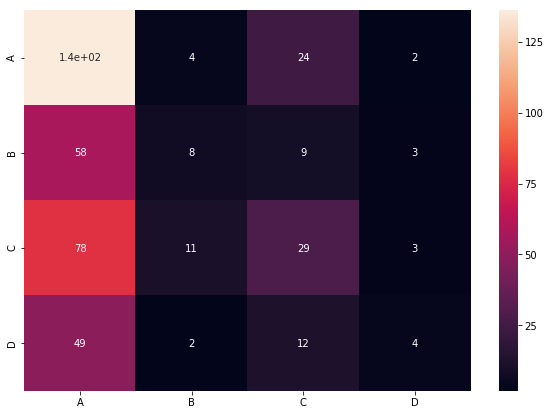

In [6]:
df_cm = pd.DataFrame(array, index = [i for i in "ABCD"],
                  columns = [i for i in "ABCD"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [7]:
array

array([[136,   4,  24,   2],
       [ 58,   8,   9,   3],
       [ 78,  11,  29,   3],
       [ 49,   2,  12,   4]])

In [8]:
y_pred

array([4., 1., 1., 3., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 1., 1., 3., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1.,
       1., 3., 1., 4., 2., 1., 1., 3., 1., 1., 3., 3., 1., 1., 3., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 3., 3., 3.,
       3., 1., 3., 1., 1., 3., 1., 1., 3., 1., 1., 1., 1., 1., 1., 2., 1.,
       1., 3., 3., 1., 1., 1., 1., 1., 3., 2., 1., 1., 1., 1., 1., 1., 3.,
       1., 3., 3., 1., 3., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 1.,
       4., 3., 1., 1., 1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       3., 1., 3., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 3., 1., 1., 2., 3., 2., 1., 1., 1., 1., 1., 1., 1., 4.,
       4., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 3., 1., 3., 1., 1., 1.,
       1., 1., 1., 1., 3., 1., 4., 1., 2., 2., 1., 1., 1., 2., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [9]:
metrics.matthews_corrcoef(y_test['ScoreClass'],y_pred)

0.11273305403292365